In [7]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import re
import pickle


file = open('QuandlApiKey', 'r')
api_key = file.read()
file.close()
df = quandl.get("FMAC/HPI_TX", authtoken=api_key)

def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return fiddy_states[0][0][2:]



In [11]:
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()
    for abbre in states:
        query = 'FMAC/HPI_'+str(abbre)
        df = quandl.get(query, authtoken=api_key)
        df.rename(columns={'Value':str(abbre)}, inplace=True)

        if main_df.empty:
            main_df=df
        else:
            main_df = main_df.join(df, how='left')
    print(main_df)

    pickle_out = open('fiddy_states.pickle','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()

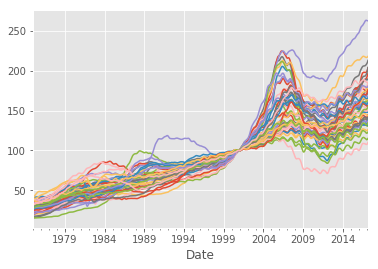

In [14]:
# Only need to run grap_initial_state_data() once
#grab_initial_state_data()

# pickle_in = open('fiddy_states.pickle','rb')
# HPI_pickle_data = pickle.load(pickle_in)
# print(HPI_pickle_data)

HPI_data = pd.read_pickle('pickle.pickle')

HPI_data.plot()
plt.legend().remove()
plt.show()

In [18]:
# use pandas to show the correlation table of the HPI of each state

HPI_State_Correlation = HPI_data.corr()
print(HPI_State_Correlation.head())

          AK        AZ        AR        CA        CO        CT        DE  \
AK  1.000000  0.913740  0.968958  0.924687  0.959531  0.883311  0.938175   
AZ  0.913740  1.000000  0.938129  0.977692  0.921470  0.915140  0.948394   
AR  0.968958  0.938129  1.000000  0.946832  0.973680  0.943174  0.977694   
CA  0.924687  0.977692  0.946832  1.000000  0.940771  0.937952  0.966011   
CO  0.959531  0.921470  0.973680  0.940771  1.000000  0.880236  0.930923   

          FL        GA        HI    ...           SD        TN        TX  \
AK  0.904693  0.903722  0.948851    ...     0.975483  0.959709  0.977707   
AZ  0.994591  0.951064  0.920672    ...     0.910663  0.935131  0.899725   
AR  0.929991  0.969260  0.952306    ...     0.986582  0.994957  0.958768   
CA  0.986476  0.953420  0.953714    ...     0.933646  0.947976  0.920663   
CO  0.913833  0.955939  0.931470    ...     0.986394  0.981656  0.979410   

          UT        VT        VA        WA        WV        WI        WY  
AK  0.96493

In [20]:
print(HPI_State_Correlation.describe().head())

              AK         AZ         AR         CA         CO         CT  \
count  49.000000  49.000000  49.000000  49.000000  49.000000  49.000000   
mean    0.940585   0.934492   0.971018   0.947187   0.952504   0.929082   
std     0.042176   0.027246   0.026390   0.024181   0.030545   0.040346   
min     0.777863   0.852627   0.865239   0.872861   0.841938   0.817784   
25%     0.928915   0.920213   0.965283   0.933646   0.933353   0.901621   

              DE         FL         GA         HI    ...             SD  \
count  49.000000  49.000000  49.000000  49.000000    ...      49.000000   
mean    0.962296   0.931363   0.953666   0.939215    ...       0.959756   
std     0.028932   0.030841   0.026719   0.033758    ...       0.035896   
min     0.867719   0.840407   0.856090   0.790766    ...       0.815458   
25%     0.950047   0.913835   0.944650   0.926750    ...       0.949747   

              TN         TX         UT         VT         VA         WA  \
count  49.000000  49.00

In [22]:
print(HPI_data.describe().head())

               AK          AZ          AR          CA          CO          CT  \
count  507.000000  507.000000  507.000000  507.000000  507.000000  507.000000   
mean   101.631235   93.410543   90.251080   96.471914   78.503518   93.327302   
std     41.927815   45.422733   30.243993   57.838654   40.605733   41.009361   
min     34.433211   28.809024   36.794925   15.674160   19.649588   24.504865   
25%     71.032017   62.144099   66.517136   46.881151   44.666182   58.841674   

               DE          FL          GA          HI     ...              SD  \
count  507.000000  507.000000  507.000000  507.000000     ...      507.000000   
mean    95.077886   98.641985   80.118104  119.035666     ...       89.561318   
std     46.303417   50.111658   30.588706   69.525374     ...       37.965499   
min     27.151956   31.050426   29.542105   26.618909     ...       35.365485   
25%     52.324854   61.532381   55.889649   52.187486     ...       57.289812   

               TN         

NameError: name 'benchmark' is not defined